# Statistics example - testing for normal distribution
## pressure transducer calibration example

Given: 20 trials of pressure reading

True pressure: $10.000 \pm 0.001$ kPa  
Acceleration = 0  
Vibration = 0  
Ambient temperature = $20 \pm 1^\circ$C

    
        


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


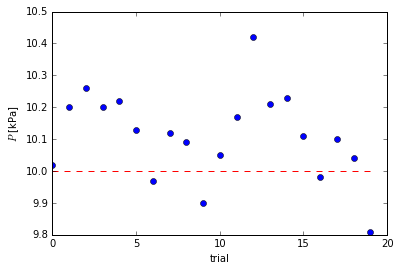

In [8]:
from pylab import *
%pylab inline

P = array([10.02, 10.20, 10.26, 10.20, 10.22, 10.13, 9.97, 10.12, 10.09, 9.90, \
     10.05, 10.17, 10.42, 10.21, 10.23, 10.11, 9.98, 10.10, 10.04, 9.81])
plot(P,'o')
plot(10.0*ones(size(P)),'r--')
xlabel('trial')
ylabel(r'$P$ [kPa]') 

## Descriptive statistics estimates 
Average: 

$$\tilde{\mu} = \frac{1}{N}\sum\limits_{k=1}^{N} x_k$$

Standard deviation: 

$$\tilde{\sigma} = \sqrt{\frac{1}{N-1}\sum\limits_{k=1}^{N} (x_k - \tilde{\mu})^2 }$$  


Root-mean-square, r.m.s. : 

$$x_{\mathrm{rms}} = \sqrt{\frac{1}{N}\sum\limits_{k=1}^{N} (x_k - \tilde{\mu})^2 }$$  




In [9]:
mu = P.mean()
sigma = P.std(ddof=1) # note the definition, remember to check if the equations are right
rms = sqrt(mean((P-mu)**2))
print 'average= %6.3f' % mu, 'standard deviation = %6.3f'% sigma,'r.m.s.= %6.3f' % rms

average= 10.111 standard deviation =  0.138 r.m.s.=  0.135


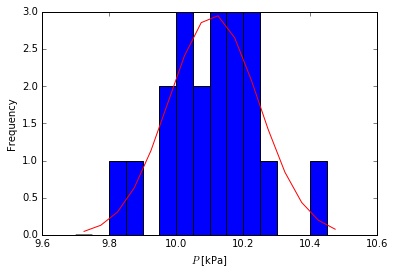

In [10]:
# We prepare histogram with the $\Delta P = 0.05$ kPa
bins = arange(9.7,10.5,0.05)
n,bins,patches = hist(P,bins=bins)
# bin centers for the plot
x = bins[:-1]+0.5*diff(bins)[0]

# Let's see if it fits normal distribution
from scipy.stats import norm
param = norm.fit(P) # param[0] = sample mean, param[1] = sample std.
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])


plot(x,pdf_fitted,'r-')
xlabel(r'$P$ [kPa]')
ylabel('Frequency')

In [11]:
import scipy.stats as st

print "skewness = %f, kurtosis = %f" % (st.skew(P), st.kurtosis(P))
# let's compare it to the values of larger random values sample:
tmp = norm.rvs(loc=param[0],scale=param[1],size=100000)
print "Normal distribution skewness -> %f, kurtosis -> %f" % (st.skew(tmp), st.kurtosis(tmp))

skewness = -0.106814, kurtosis = 0.214252
Normal distribution skewness -> -0.001648, kurtosis -> 0.009373


In [12]:
sum((n - pdf_fitted)**2/(pdf_fitted))

8.7021053575230969

# $\chi^2$ test 

In [13]:
chi_sq = sum((n - pdf_fitted)**2/(pdf_fitted))
print chi_sq

# degrees of freedom = number of non-zero bins - 3, count 13, zero between two values count.
print n
dof = 13 - 3

8.70210535752
[ 0.  0.  1.  1.  0.  2.  3.  2.  3.  3.  3.  1.  0.  0.  1.  0.]


In [14]:
from scipy.stats import chi2

# one-sided Chi^2 test
pval = 1 - chi2.cdf(chi_sq, dof)
print 'Confidence level is: %3.1f percent' % (pval*100)

Confidence level is: 56.1 percent
